# **INTRODUCTION**

# Defining the Question

# Defining the Metric of Success

# Understaning the Context

# Data Relevance

# Recording the Experimental Design

# **DATA PREPARATION**

# Importing required libraries

In [1]:
#first, we shall import the different python libraries that we are going to use

#Reading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.datasets import make_blobs
import os
from sklearn.preprocessing import LabelEncoder

# Reading the dataset

In [2]:
#We can now read our dataset
Dataset = ("obesity.csv")

def read (data):
  return pd.read_csv(data)

obese=read(Dataset)


In [3]:
#let's preview the top of our dataset
obese.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#let's preview the bottom features of our dataset
obese.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
#checking the shape of our dataset
print('Number of records in our obesity dataset is: ' + str(obese.shape))

Number of records in our obesity dataset is: (2111, 17)


The output shows that our dataset has 2,111 entries with 17 columns

In [6]:
#checking the information of our dataset
obese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

We can see that variables of our dataset are of object and float datatypes and there is no null values which we shall confirm

In [7]:
#checking for the statistical summary of our dataset
obese.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# **DATA CLEANING**

In [8]:
#renaming the columns
obese.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
obese.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family_History_with_Overweight',
       'Frequent_consumption_of_high_caloric_food', 'Frequency_of_consumption_of_vegetables', 'Number_of_main_meals', 'Consumption_of_food_between_meals', 'Smoke', 'Consumption_of_water_daily', 'Calories_consumption_monitoring', 'Physical_activity_frequency', 'Time_using_technology_devices',
       'Consumption_of_alcohol', 'Transportation_used', 'Obesity']
obese      


,Gender,Age,Height,Weight,Family_History_with_Overweight,Frequent_consumption_of_high_caloric_food,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoke,Consumption_of_water_daily,Calories_consumption_monitoring,Physical_activity_frequency,Time_using_technology_devices,Consumption_of_alcohol,Transportation_used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [10]:
# Changing all column names to lower case
obese.columns = obese.columns.str.lower()
# Checking changes
obese.columns

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'frequent_consumption_of_high_caloric_food',
       'frequency_of_consumption_of_vegetables', 'number_of_main_meals',
       'consumption_of_food_between_meals', 'smoke',
       'consumption_of_water_daily', 'calories_consumption_monitoring',
       'physical_activity_frequency', 'time_using_technology_devices',
       'consumption_of_alcohol', 'transportation_used', 'obesity'],
      dtype='object')

In [11]:
#we can see that some rows in the age column have decimal points, therefore we round them off. 
#Also replacing the hyphens in the trasportation used and obesity columns
obese['obesity'] = obese['obesity'].apply(lambda x: x.replace('_', ' '))
obese['transportation_used'] = obese['transportation_used'].apply(lambda x: x.replace('_', ' '))
# obese['age'] = obese['age'].round(1)
obese

,gender,age,height,weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


# Checking for Missing Values

In [12]:
#checking for missing values
obese.isnull().sum()

gender                                       0
age                                          0
height                                       0
weight                                       0
family_history_with_overweight               0
frequent_consumption_of_high_caloric_food    0
frequency_of_consumption_of_vegetables       0
number_of_main_meals                         0
consumption_of_food_between_meals            0
smoke                                        0
consumption_of_water_daily                   0
calories_consumption_monitoring              0
physical_activity_frequency                  0
time_using_technology_devices                0
consumption_of_alcohol                       0
transportation_used                          0
obesity                                      0
dtype: int64

From the output, we can see that there are no missing values

# Checking for Duplicates

In [13]:
#let's check for any duplicated values
print(obese.duplicated(subset=None, keep='first'))

#hence, print the sum of duplicated values
print(obese.duplicated().sum())

# dropping duplicates
obese.drop_duplicates()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool
24


,gender,age,height,weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


There are 24 duplicated values 

# Checking for Cardinality

In [14]:
# Check Cardinality
# We will use a for loop to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the obesity dataset
print('Cardinality of the dataset columns:\n')
for i in obese.columns:
  print(f'{i:<17} : {obese[i].nunique()}')

Cardinality of the dataset columns:

gender            : 2
age               : 1402
height            : 1574
weight            : 1525
family_history_with_overweight : 2
frequent_consumption_of_high_caloric_food : 2
frequency_of_consumption_of_vegetables : 810
number_of_main_meals : 635
consumption_of_food_between_meals : 4
smoke             : 2
consumption_of_water_daily : 1268
calories_consumption_monitoring : 2
physical_activity_frequency : 1190
time_using_technology_devices : 1129
consumption_of_alcohol : 4
transportation_used : 5
obesity           : 7


Weight, Height, Consumption of water daily, Physical activity frequency, and time using technology devices columns have very large number of unique variables.

In [15]:
# Checking for the exact unique values in the dataset
# We will use a for loop to iterate through the different columns
#
for i in obese.columns:
  
  print(i)
  print(obese[i].unique(),'\n')

gender
['Female' 'Male'] 

age
[21.       23.       27.       ... 22.524036 24.361936 23.664709] 

height
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836] 

weight
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641] 

family_history_with_overweight
['yes' 'no'] 

frequent_consumption_of_high_caloric_food
['no' 'yes'] 

frequency_of_consumption_of_vegetables
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2

In [16]:
#Describe the data
# Printing the unique values
columns = obese.columns
for i in columns:
  print('Unique values in', i , 'are :')
  print(obese[i].unique())
  print('number of unique values',len(obese[i].unique()))
  print('                                                                           ')
  print('***************************************************************************')

Unique values in gender are :
['Female' 'Male']
number of unique values 2
                                                                           
***************************************************************************
Unique values in age are :
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
number of unique values 1402
                                                                           
***************************************************************************
Unique values in height are :
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
number of unique values 1574
                                                                           
***************************************************************************
Unique values in weight are :
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
number of unique values 1525
                                                                           
**********************

# Checking for outliers

Boxplot visualization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


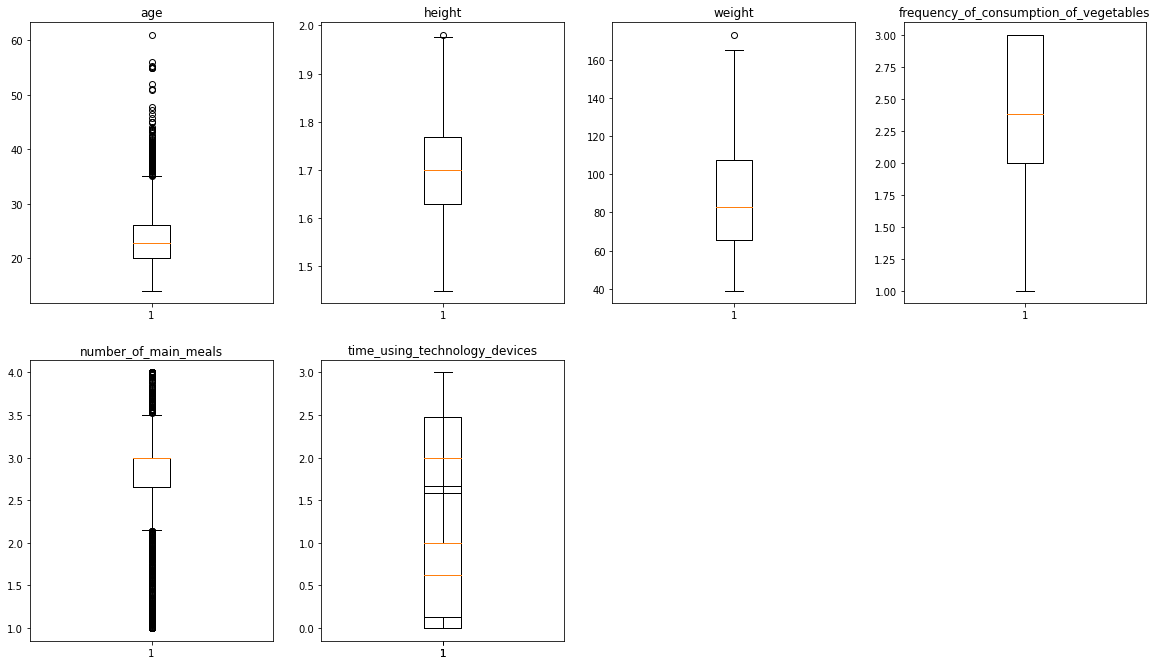

In [17]:
# checking for outliers
# making a dictionary for numerical columns
columns_dict = {'age': 1, 'height': 2, 'weight': 3, 'frequency_of_consumption_of_vegetables': 4, 'number_of_main_meals': 5, 'consumption_of_water_daily': 6,'physical_activity_frequency': 6, 'time_using_technology_devices': 6}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(obese[variable])
  plt.title(variable)

plt.show()

In [18]:
# we shall check whether the outliers will skew our data or not LOL!
# making a dictionary for numerical columns
columns_dict = {'age': 1, 'height': 2, 'weight': 3, 'frequency_of_consumption_of_vegetables': 4, 'number_of_main_meals': 5, 'consumption_of_water_daily': 6,'physical_activity_frequency': 6, 'time_using_technology_devices': 6}

# make a max/min for each numerical column
for variable,i in columns_dict.items():
  print('The minimum & the maximum value in', variable , 'is :' )
  print(obese[variable].min()),print(obese[variable].max())
  # print('The maximum value in', variable , 'is :')
  # print(obese[variable].max())
 



The minimum & the maximum value in age is :
14.0
61.0
The minimum & the maximum value in height is :
1.45
1.98
The minimum & the maximum value in weight is :
39.0
173.0
The minimum & the maximum value in frequency_of_consumption_of_vegetables is :
1.0
3.0
The minimum & the maximum value in number_of_main_meals is :
1.0
4.0
The minimum & the maximum value in consumption_of_water_daily is :
1.0
3.0
The minimum & the maximum value in physical_activity_frequency is :
0.0
3.0
The minimum & the maximum value in time_using_technology_devices is :
0.0
2.0


- Therefore we can confirm with absolute certainity that there are no outliers present within our dataset.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


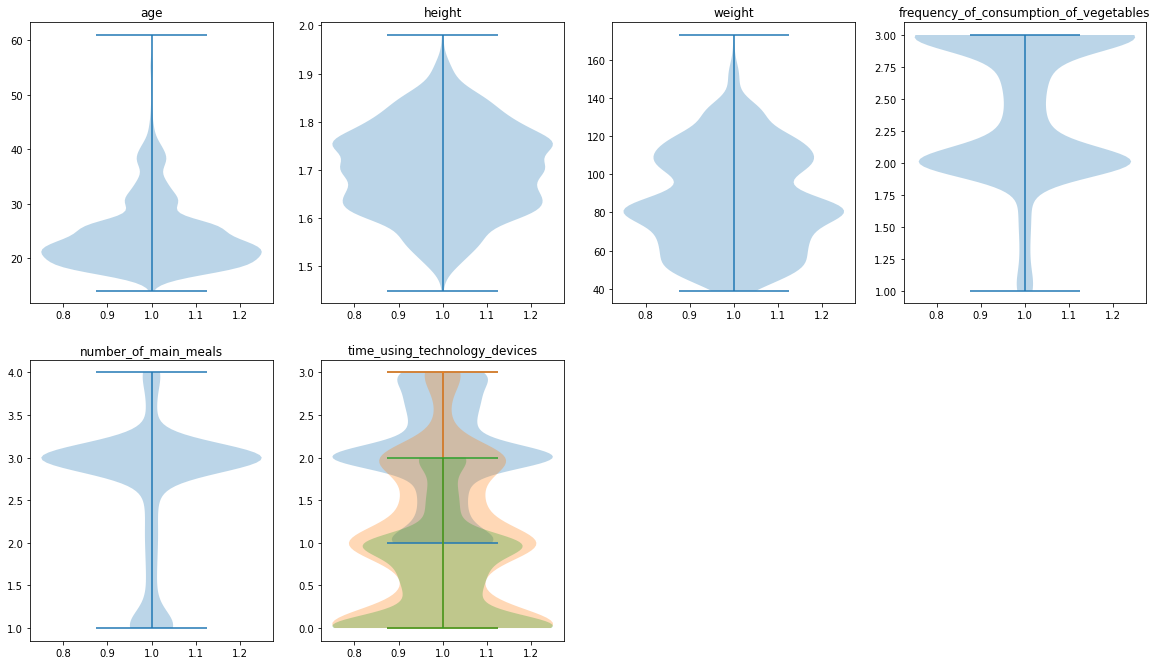

In [19]:
# VISUALIZING THE DISTRIBUTION OF THE NUMERICAL DATA (BETTER)
# making a dictionary for numerical columns
columns_dict = {'age': 1, 'height': 2, 'weight': 3, 'frequency_of_consumption_of_vegetables': 4, 'number_of_main_meals': 5, 'consumption_of_water_daily': 6,'physical_activity_frequency': 6, 'time_using_technology_devices': 6}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.violinplot(obese[variable])
  plt.title(variable)

plt.show()

# **EXPLORATORY DATA ANALYSIS**

# a) Univariate Analysis

Frequency table assessment

In [20]:
# Frequency distribution of features in the dataset
for var in obese.columns:
    print(obese[var].value_counts())

Male      1068
Female    1043
Name: gender, dtype: int64
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: age, Length: 1402, dtype: int64
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: height, Length: 1574, dtype: int64
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: weight, Length: 1525, dtype: int64
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64
yes    1866
no      245
Name: frequent_consumption_of_high_caloric_food, dtype: int64
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134   

In [21]:
obese.columns

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'frequent_consumption_of_high_caloric_food',
       'frequency_of_consumption_of_vegetables', 'number_of_main_meals',
       'consumption_of_food_between_meals', 'smoke',
       'consumption_of_water_daily', 'calories_consumption_monitoring',
       'physical_activity_frequency', 'time_using_technology_devices',
       'consumption_of_alcohol', 'transportation_used', 'obesity'],
      dtype='object')

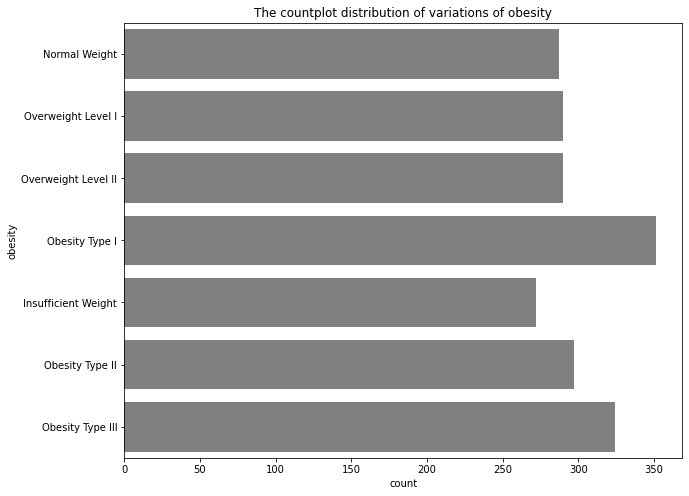

In [22]:
#A count plot for the outcome classificaton

plt.figure(figsize=(10,8))
plt.title("The countplot distribution of variations of obesity")
# sns.countplot(obese.Obesity)
ax = sns.countplot(y='obesity', data=obese, color = 'grey')

Histograms

<Figure size 1000x300 with 0 Axes>

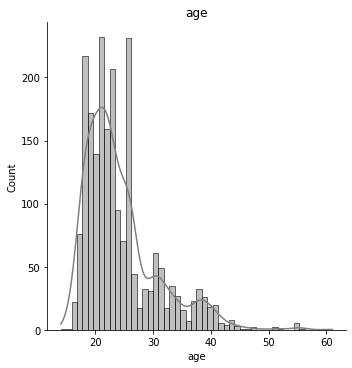

<Figure size 1000x300 with 0 Axes>

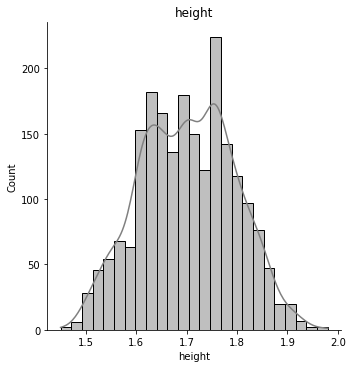

<Figure size 1000x300 with 0 Axes>

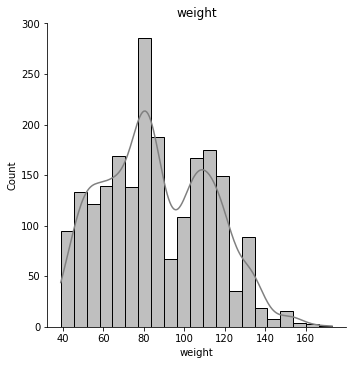

<Figure size 1000x300 with 0 Axes>

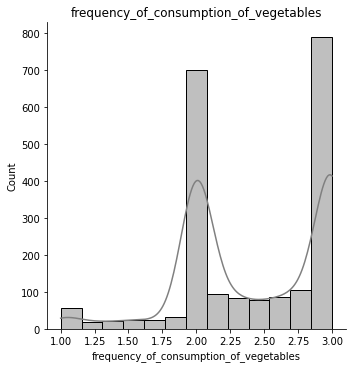

<Figure size 1000x300 with 0 Axes>

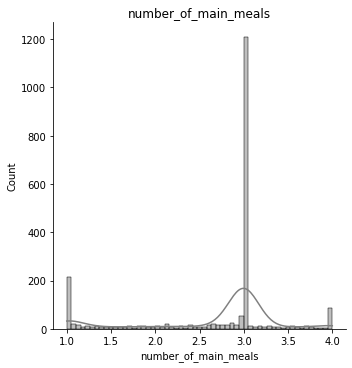

<Figure size 1000x300 with 0 Axes>

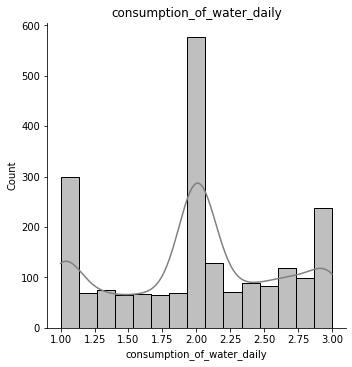

<Figure size 1000x300 with 0 Axes>

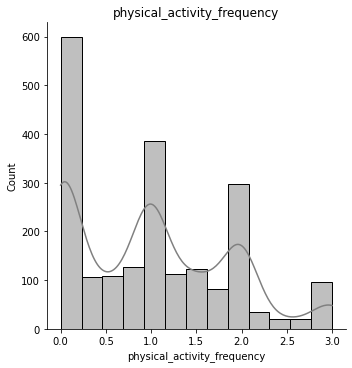

<Figure size 1000x300 with 0 Axes>

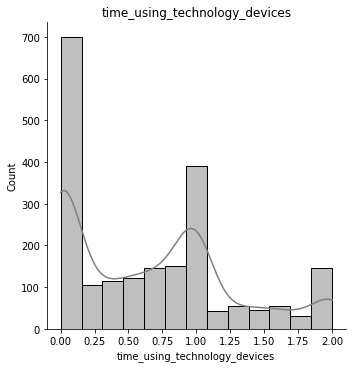

In [23]:
#PLotting histrograms for categorical values
for i in columns_dict:
  plt.figure(figsize = (10,3), dpi=100)
  sns.displot(obese[i], kde = True, color = 'grey')
  plt.title(i, color = 'Black')
  plt.show()

- According to to the histograms 
1. Most people are between the ages of 20 - 30 (young)
2. Most people are 1.6 to 1.8 in height (average height)
3. Most people are between 70 - 80 in weight
4. Most people have 3 meals a day
5. Most people consume vegetables 3 times a day
6. Most people have 2 glasses of water a day
7. Most people have no physical exercises
8. Most people dont use technnology devices

Piechart function

In [24]:
# Creating pie charts for columns
def pie(obese,column):
  data=obese[column].value_counts()
  sns.set(font_scale=1.4)
  plt.figure(figsize=(7,6))
  explode = (0, 0.1)
  colors = ['grey','grey']
  pie=data.plot.pie(autopct='%1.1f%%',labels=(obese[column].unique()),
                    startangle=0,explode=explode, colors = colors)
  plt.axis('equal')
  plt.title=(f'{column}'" DISTRIBUTION")
  plt.show()
  return plt.show()

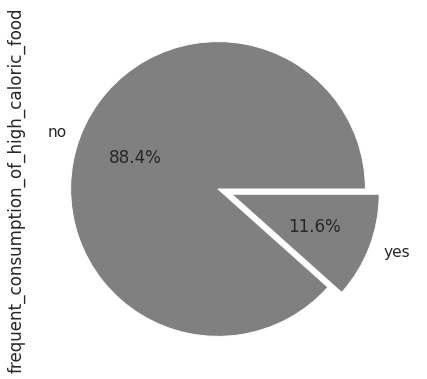

In [25]:
pie(obese,'frequent_consumption_of_high_caloric_food')

- Lol, most people don't consume food rich in calories but most people have different forms of obesity.

# b) Bivariate Analysis

In [26]:
# # Plotting a pairplot of the entire dataset
# sns.pairplot(obese)
# plt.show()

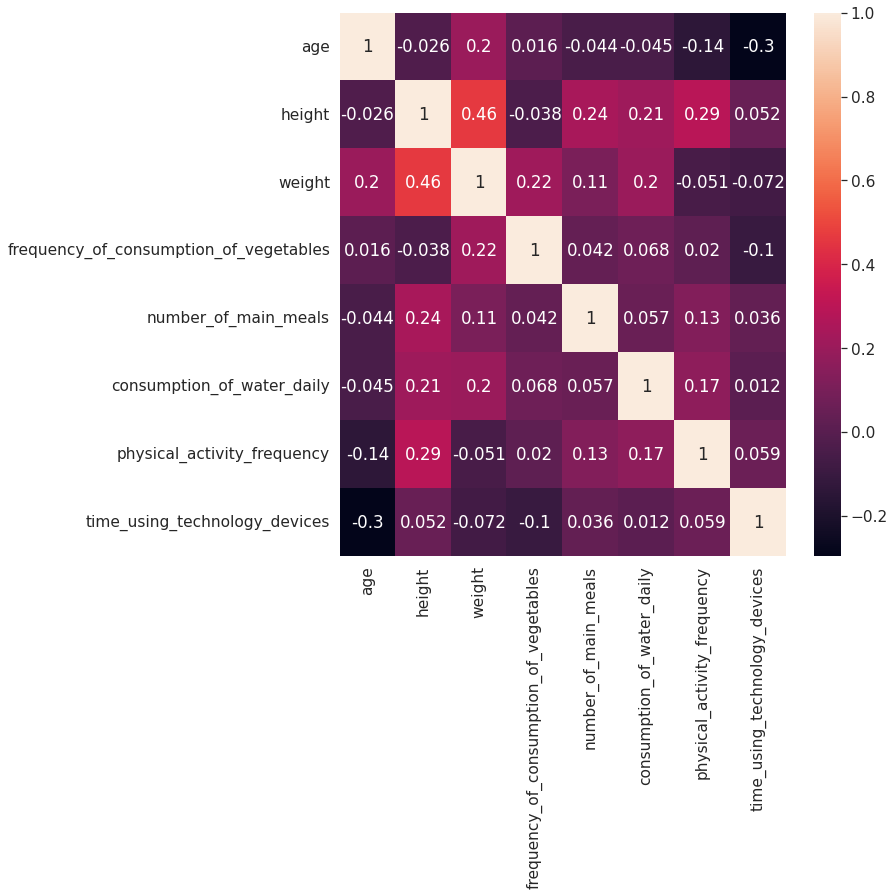

In [27]:
# Plotting a correlation matrix
plt.subplots(figsize=(10,10))
sns.heatmap(obese.corr(), annot=True)
plt.show()

- The correlation between the variables wasnt that bad as it ranged on the lower quartiles of having a direct relationship.

## k means clustering

In [28]:
# loading libraries
#!pip install pip 22.1.2
! pip install --upgrade kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Explore obesity variable

In [29]:
# view the labels in the variable
df = obese
df['obesity'].unique()

array(['Normal Weight', 'Overweight Level I', 'Overweight Level II',
       'Obesity Type I', 'Insufficient Weight', 'Obesity Type II',
       'Obesity Type III'], dtype=object)

In [30]:
len(df['obesity'].unique())

7

We can see that there are 7 categories of labels in the status_type variable.

Generate the synthetic data and labels i.e.
Declare feature vector and target variable 


In [31]:
X = df.drop(['obesity'], axis=1)

y = df['obesity']
y

0             Normal Weight
1             Normal Weight
2             Normal Weight
3        Overweight Level I
4       Overweight Level II
               ...         
2106       Obesity Type III
2107       Obesity Type III
2108       Obesity Type III
2109       Obesity Type III
2110       Obesity Type III
Name: obesity, Length: 2111, dtype: object

## Convert categorical variable into numeric 

In [32]:
# listing categorical variables
objList = X.select_dtypes(include = "object").columns
print (objList)


Index(['gender', 'family_history_with_overweight',
       'frequent_consumption_of_high_caloric_food',
       'consumption_of_food_between_meals', 'smoke',
       'calories_consumption_monitoring', 'consumption_of_alcohol',
       'transportation_used'],
      dtype='object')


In [33]:
#Label Encoding for object to numeric conversion

le = LabelEncoder()
X[objList] = X[objList].apply(le.fit_transform)
X[objList] = X[objList].apply(pd.to_numeric, errors='coerce')
la = LabelEncoder()
la.fit(y)
y = la.transform(y)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   gender                                     2111 non-null   int64  
 1   age                                        2111 non-null   float64
 2   height                                     2111 non-null   float64
 3   weight                                     2111 non-null   float64
 4   family_history_with_overweight             2111 non-null   int64  
 5   frequent_consumption_of_high_caloric_food  2111 non-null   int64  
 6   frequency_of_consumption_of_vegetables     2111 non-null   float64
 7   number_of_main_meals                       2111 non-null   float64
 8   consumption_of_food_between_meals          2111 non-null   int64  
 9   smoke                                      2111 non-null   int64  
 10  consumption_of_water_dai

In [34]:
df = X.copy()

## Feature Scaling

let us preview X

In [35]:
X.head()

,gender,age,height,weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


let us look at two clusters.

In [36]:
# K-Means model with two clusters 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

 K-Means model parameters study 

In [37]:
kmeans.cluster_centers_

array([[6.01212121e-01, 2.54651692e+01, 1.74327681e+00, 1.14244911e+02,
        9.93939394e-01, 9.81818182e-01, 2.56964579e+00, 2.80566827e+00,
        1.97818182e+00, 2.30303030e-02, 2.10919768e+00, 2.42424242e-03,
        9.15503888e-01, 6.42588230e-01, 2.16242424e+00, 2.48000000e+00],
       [4.44790047e-01, 2.35731989e+01, 1.67499030e+00, 6.88422372e+01,
        7.04510109e-01, 8.21150855e-01, 2.32242778e+00, 2.60861936e+00,
        1.78304821e+00, 1.94401244e-02, 1.94309797e+00, 7.30948678e-02,
        1.07111021e+00, 6.67666932e-01, 2.33670295e+00, 2.29160187e+00]])

we will do pca if high dimensional spaces and euclidean distances get inflated.


Inertia

In [38]:
kmeans.inertia_

504935.4804102435

We can see that the model has very high inertia. So, this is not a good model fit to the data.

The lesser the model inertia, the better the model fit.

## Check quality of weak classification by the model

In [39]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 287 out of 2111 samples were correctly labeled.


seems like we have 240 out of 2111 samples were labelled correctly. 

### accuracy

In [40]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.14


We have achieved a weak classification accuracy of 11% by our unsupervised model with two clusters.

## Use elbow method to find optimal number of clusters 

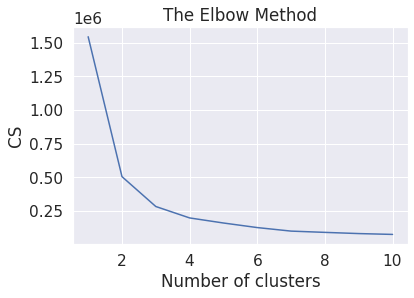

In [41]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

By the above plot, we can see that there is a kink at k=2. Hence k=2 can be considered a good number of the cluster to cluster this data.But, we have seen that we have achieved a weak classification accuracy of 11% with k=2.


## K-Means model with different clusters

K-Means model with 3 clusters

In [42]:


kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))



Result: 486 out of 2111 samples were correctly labeled.
Accuracy score: 0.23


Our accuracy has dropped down to 10% with 3 clusters. Let us see with 4 clusters next.

K-Means model with 4 clusters

In [43]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 79 out of 2111 samples were correctly labeled.
Accuracy score: 0.04


from above we can see that with 4 clusters, we achieved an accuracy of 4% showing that the more the value of k the less accurate the model.

Let us now compare k means to other types of clustering algorithms.

# Density Based Spacial Clustering of Applications with noise (DBSCAN)

Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.
Steps in DBSCAN

* The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).
* If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.
* The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point

## Why do we need a Density-Based clustering algorithm like DBSCAN when we already have K-means clustering?

K-Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come across some odd shape data.

Another challenge with k-means is that you need to specify the number of clusters (“k”) in order to use it. Much of the time, we won’t know what a reasonable k value is a priori.

What’s nice about DBSCAN is that you don’t have to specify the number of clusters to use it. All you need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions. Below figure illustrates the fact:



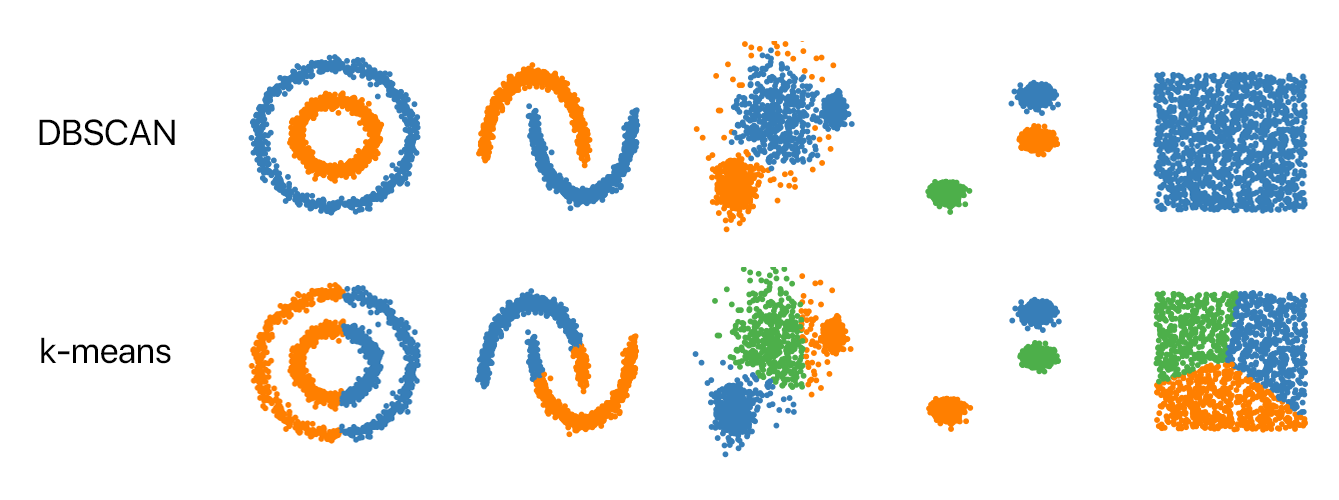

## Model

### PCA

In [44]:
# Apply Principle Component Anaylsis for visualizing the data in 2D space.

pca = PCA()
pca_data = pca.fit_transform(df)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(df.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

pca.explained variance ratio:
  0.941 0.054 0.001 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000


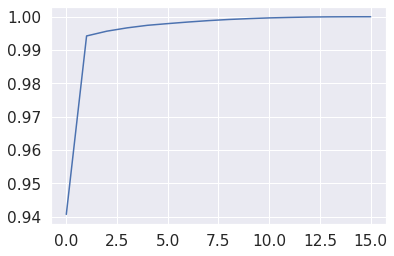

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

* PCA is used to visualize the data.
* From the Explanied Variance Ratio graph, the first two principle component can explain 99.5% of the all variance. Also, there is an elbow after the second principle component, so pc1 and pc2 are enough for representing this data. 

### Find optimal parameter setting for DBSCAN.

In [46]:
epsilon = [1,1.25,1.5,1.75, 2,2.25,2.5,2.75, 3,3.25,3.5,3.75, 4]
min_samples = [10,15,20,25]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        
        silhouette_avg = metrics.silhouette_score(df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 3.25 
min_sample= 25 
number of clusters= 8 
average silhouette score= 0.0774


* The model (epsilon = 3.25 and min_sample = 25) which has 0.0774 maximum average silhouette score has the optimal number of cluster; 8.

### DBSCAN

In [47]:
# Apply DBSCAN

db = DBSCAN(eps=3.25, min_samples=25).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df, labels))

Estimated number of clusters: 8
Estimated number of noise points: 582
Silhouette Coefficient: 0.077


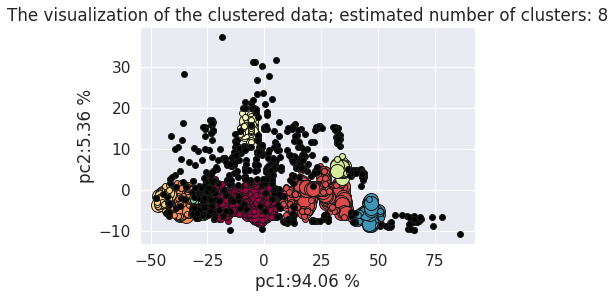

In [48]:
# Plot result
pca_data1 = pca_data[["pc1","pc2"]].copy()
data1 = df.copy() # data1 is created, we do not want to change original data as adding the cluster column.

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0,1]

    class_member_mask = (labels == k)

    xy = pca_data1[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_data1[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('The visualization of the clustered data; estimated number of clusters: %d' % n_clusters_)
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

* 8 clusters are identified by DBSCAN algorithm. The result is plotted in terms of pc1 and pc2. Black points in the graph represent the outliers.

In [49]:
# save the model to disk
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

filename = 'finalized_model.sav'
pickle.dump(db, open(filename, 'wb'))

### Labels

In [50]:
# Let's create a new column with the generated cluster labels
df['labels'] = labels
df.head(10)

,gender,age,height,weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,labels
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,2
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,-1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,0
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,-1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,2
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,2
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,0
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,0


In [51]:
# Unique
df.labels.unique()

array([ 0,  2, -1,  1,  3,  6,  4,  5,  7])

## Conclusion

Using DBSCAN, We get 8 different categories/labels. -1 Label is for outliers thus we remain with 7 labels. Remember, our dataset had seven target variables i.e:

* 'Normal_Weight' 
* 'Overweight_Level_I' 
* 'Overweight_Level_II'
* 'Obesity_Type_I' 
* 'Insufficient_Weight' 
* 'Obesity_Type_II'
* 'Obesity_Type_III'

With the relevant domain knowledge, we will assign the 7 labels to these obesity categories.

In [52]:
# Based on domain knowledge, I am renaming the clusters.
df['labels'] = df['labels'].map({
    -1: 'Outlier',
    0: 'Normal_Weight', 
    1: 'Overweight_Level_I', 
    2: 'Overweight_Level_II', 
    3: 'Obesity_Type_I', 
    4: 'Insufficient_Weight',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'}) 
df.head(20)

,gender,age,height,weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,labels
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Overweight_Level_II
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Outlier
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Normal_Weight
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,Outlier
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,Overweight_Level_II
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,Overweight_Level_II
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,Normal_Weight
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,Normal_Weight


Let us use Hierachical clustering.

# **HIERARCHIAL CLUSTERING**

In [53]:
# We first start by importing the relevant libraries
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn libraries
from sklearn import preprocessing
from sklearn.decomposition import PCA

#hierarchial clustering libraries
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 

In [54]:
# Because our clustering should be unsupervised, we need to drop the target label

obese1 = obese.drop(columns="obesity")
obese1.columns

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'frequent_consumption_of_high_caloric_food',
       'frequency_of_consumption_of_vegetables', 'number_of_main_meals',
       'consumption_of_food_between_meals', 'smoke',
       'consumption_of_water_daily', 'calories_consumption_monitoring',
       'physical_activity_frequency', 'time_using_technology_devices',
       'consumption_of_alcohol', 'transportation_used'],
      dtype='object')

In [55]:
#A code to label encode every variable of the datatype object
def label_encode ():
    from sklearn import preprocessing 
    le = preprocessing.LabelEncoder()
    obese1[obese1.select_dtypes(include=['object']).columns] = obese1[obese1.select_dtypes(include=['object']).columns].apply(le.fit_transform)
    return obese1.head()
label_encode()

,gender,age,height,weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


In [56]:
# #Lets now standardize the dataset
x = obese1.values
Standard_scaler = preprocessing.StandardScaler()
x_scaled = Standard_scaler.fit_transform(x)
obese1_scaled = pd.DataFrame(x_scaled, index = obese1.index, columns = obese1.columns) 
                               
obese1_scaled.head()

,gender,age,height,weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337


In [57]:
#select columns
X1 = obese1[obese1.columns[12:18]]
X1

,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
0,0.000000,1.000000,3,3
1,3.000000,0.000000,2,3
2,2.000000,1.000000,1,3
3,2.000000,0.000000,1,4
4,0.000000,0.000000,2,3
...,...,...,...,...
2106,1.676269,0.906247,2,3
2107,1.341390,0.599270,2,3
2108,1.414209,0.646288,2,3
2109,1.139107,0.586035,2,3


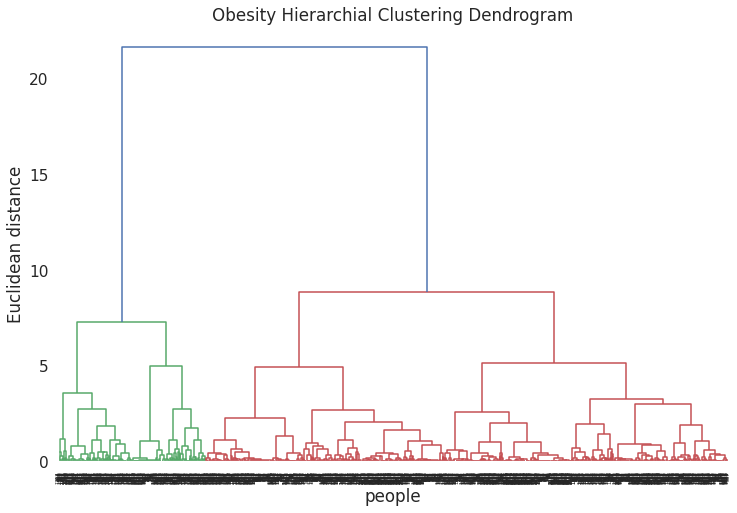

In [58]:
#so we plot the dengrogram
X1 = obese1[obese1.columns[12:17]]
X1 = preprocessing.normalize(X1)
plt.figure(figsize=(12, 8))  
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X1,method='ward'))
plt.title('Obesity Hierarchial Clustering Dendrogram')
plt.xlabel('people')
plt.ylabel('Euclidean distance')
plt.show()

In [59]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters= 7, affinity= 'euclidean', linkage= 'ward')
y_hc=hc.fit_predict(X1)
y_hc

array([1, 3, 3, ..., 3, 1, 1])

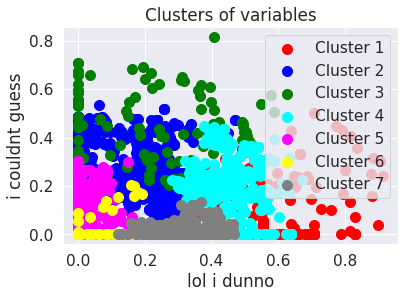

In [60]:
plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_hc == 2, 0], X1[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_hc == 3, 0], X1[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X1[y_hc == 4, 0], X1[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X1[y_hc == 5, 0], X1[y_hc == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(X1[y_hc == 6, 0], X1[y_hc == 6, 1], s = 100, c = 'grey', label = 'Cluster 7')
plt.title('Clusters of variables')
plt.xlabel("lol i dunno")
plt.ylabel('i couldnt guess')
plt.legend()
plt.show()



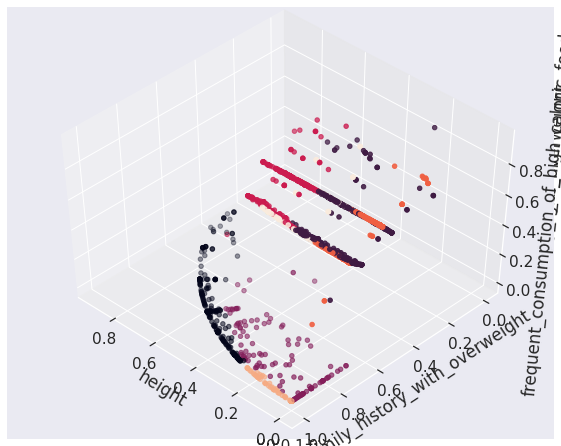

In [61]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
plt.cla()
ax.set_xlabel("people")
ax.set_ylabel("")
ax.set_zlabel("")
#ax.scatter(normalised_X[:,2],normalised_X[:,3],normalised_X[:,4],c=y_hc.astype(Float))
for i in range (0,3):
    ax = Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
    plt.cla()
    ax.set_xlabel(obese.columns[2])
    ax.set_ylabel(obese.columns[2+i])
    ax.set_zlabel(obese.columns[3+i])
    ax.scatter(X1[:,0],X1[:,i],X1[:,i+1],c=y_hc.astype(float))

## Implementation